In [1]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv("../Data/강남 일별 시간대별 승객유형별 승하차인원 정리.csv")

In [4]:
df.head()

,datetime,외국인,우대권,일반
0,2022-06-01 05:00:00,6.0,116.0,939.0
1,2022-06-01 06:00:00,0.0,349.0,1085.0
2,2022-06-01 07:00:00,0.0,232.0,1280.0
3,2022-06-01 08:00:00,0.0,205.0,2402.0
4,2022-06-01 09:00:00,1.0,249.0,3740.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  14620 non-null  object 
 1   외국인       14620 non-null  float64
 2   우대권       14620 non-null  float64
 3   일반        14620 non-null  float64
dtypes: float64(3), object(1)
memory usage: 457.0+ KB


In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  14620 non-null  datetime64[ns]
 1   외국인       14620 non-null  float64       
 2   우대권       14620 non-null  float64       
 3   일반        14620 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 457.0 KB


In [8]:
import holidays

# 한국 공휴일 정보
kr_holidays = holidays.KR()

# 날짜/시간 관련 정보 추가
df['시간'] = df['datetime'].dt.hour  # 시간 추출
df['요일'] = df['datetime'].dt.dayofweek  # 요일 (0: 월요일, ..., 6: 일요일)
df['주말'] = df['요일'].apply(lambda x: 1 if x >= 5 else 0)  # 주말 여부
df['공휴일'] = df['datetime'].apply(lambda x: 1 if x in kr_holidays else 0)  # 공휴일 여부

# 결과 확인
df.head()

,datetime,외국인,우대권,일반,시간,요일,주말,공휴일
0,2022-06-01 05:00:00,6.0,116.0,939.0,5,2,0,1
1,2022-06-01 06:00:00,0.0,349.0,1085.0,6,2,0,1
2,2022-06-01 07:00:00,0.0,232.0,1280.0,7,2,0,1
3,2022-06-01 08:00:00,0.0,205.0,2402.0,8,2,0,1
4,2022-06-01 09:00:00,1.0,249.0,3740.0,9,2,0,1


In [9]:
df.head(20)

,datetime,외국인,우대권,일반,시간,요일,주말,공휴일
0,2022-06-01 05:00:00,6.0,116.0,939.0,5,2,0,1
1,2022-06-01 06:00:00,0.0,349.0,1085.0,6,2,0,1
2,2022-06-01 07:00:00,0.0,232.0,1280.0,7,2,0,1
3,2022-06-01 08:00:00,0.0,205.0,2402.0,8,2,0,1
4,2022-06-01 09:00:00,1.0,249.0,3740.0,9,2,0,1
5,2022-06-01 10:00:00,3.0,289.0,3452.0,10,2,0,1
6,2022-06-01 11:00:00,4.0,395.0,3942.0,11,2,0,1
7,2022-06-01 12:00:00,5.0,353.0,4875.0,12,2,0,1
8,2022-06-01 13:00:00,0.0,436.0,5214.0,13,2,0,1
9,2022-06-01 14:00:00,9.0,441.0,4985.0,14,2,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  14620 non-null  datetime64[ns]
 1   외국인       14620 non-null  float64       
 2   우대권       14620 non-null  float64       
 3   일반        14620 non-null  float64       
 4   시간        14620 non-null  int32         
 5   요일        14620 non-null  int32         
 6   주말        14620 non-null  int64         
 7   공휴일       14620 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2)
memory usage: 799.7 KB


In [11]:
# '연', '월', '일' 컬럼 추가
df['연'] = df['datetime'].dt.year
df['월'] = df['datetime'].dt.month
df['일'] = df['datetime'].dt.day

# 결과 확인
df.head()

,datetime,외국인,우대권,일반,시간,요일,주말,공휴일,연,월,일
0,2022-06-01 05:00:00,6.0,116.0,939.0,5,2,0,1,2022,6,1
1,2022-06-01 06:00:00,0.0,349.0,1085.0,6,2,0,1,2022,6,1
2,2022-06-01 07:00:00,0.0,232.0,1280.0,7,2,0,1,2022,6,1
3,2022-06-01 08:00:00,0.0,205.0,2402.0,8,2,0,1,2022,6,1
4,2022-06-01 09:00:00,1.0,249.0,3740.0,9,2,0,1,2022,6,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  14620 non-null  datetime64[ns]
 1   외국인       14620 non-null  float64       
 2   우대권       14620 non-null  float64       
 3   일반        14620 non-null  float64       
 4   시간        14620 non-null  int32         
 5   요일        14620 non-null  int32         
 6   주말        14620 non-null  int64         
 7   공휴일       14620 non-null  int64         
 8   연         14620 non-null  int32         
 9   월         14620 non-null  int32         
 10  일         14620 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(5), int64(2)
memory usage: 971.0 KB


In [13]:
# 원하는 컬럼 순서 정의
columns = ['datetime', '연', '월', '일', '시간', '요일', '주말', '공휴일', '외국인', '우대권', '일반']

# 컬럼 순서 재배치
df = df[columns]

# 결과 확인
df.head()

,datetime,연,월,일,시간,요일,주말,공휴일,외국인,우대권,일반
0,2022-06-01 05:00:00,2022,6,1,5,2,0,1,6.0,116.0,939.0
1,2022-06-01 06:00:00,2022,6,1,6,2,0,1,0.0,349.0,1085.0
2,2022-06-01 07:00:00,2022,6,1,7,2,0,1,0.0,232.0,1280.0
3,2022-06-01 08:00:00,2022,6,1,8,2,0,1,0.0,205.0,2402.0
4,2022-06-01 09:00:00,2022,6,1,9,2,0,1,1.0,249.0,3740.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  14620 non-null  datetime64[ns]
 1   연         14620 non-null  int32         
 2   월         14620 non-null  int32         
 3   일         14620 non-null  int32         
 4   시간        14620 non-null  int32         
 5   요일        14620 non-null  int32         
 6   주말        14620 non-null  int64         
 7   공휴일       14620 non-null  int64         
 8   외국인       14620 non-null  float64       
 9   우대권       14620 non-null  float64       
 10  일반        14620 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(5), int64(2)
memory usage: 971.0 KB


In [14]:
# 모델 입력 특징(Feature)과 출력(Target) 변수 설정
features = ['연', '월', '일', '시간', '요일', '주말', '공휴일']
targets = ['외국인', '우대권', '일반']

X = df[features]
y = df[targets]

In [15]:
from sklearn.model_selection import train_test_split

# 데이터를 학습/테스트로 분할 (80:20 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("학습 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)

학습 데이터 크기: (11696, 7)
테스트 데이터 크기: (2924, 7)


In [22]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤포레스트 모델 초기화
model = RandomForestRegressor(
    n_estimators=200, max_depth=12, min_samples_split=5, random_state=42
)

# 모델 학습
model.fit(X_train, y_train)

# 학습 데이터 점수
train_score = model.score(X_train, y_train)
print(f"Train Score (R²): {train_score}")

# 테스트 데이터 점수
test_score = model.score(X_test, y_test)
print(f"Test Score (R²): {test_score}")

# 교차 검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {scores.mean()}")

Train Score (R²): 0.8676604386973267
Test Score (R²): 0.8474833969102428
Cross-Validation Scores: [0.00596679 0.79843111 0.84022086 0.82518692 0.8441219 ]
Mean CV Score: 0.662785515920872


In [25]:
from sklearn.model_selection import KFold, cross_val_score

# K-Fold 교차 검증
kfold_cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kfold_cv, scoring='r2')
print(f"K-Fold Cross-Validation Scores: {scores}")
print(f"Mean K-Fold CV Score: {scores.mean()}")

K-Fold Cross-Validation Scores: [0.84786793 0.85686431 0.84979931 0.85183775 0.8492346 ]
Mean K-Fold CV Score: 0.8511207815343893


In [52]:
import pandas as pd
import holidays
from datetime import datetime, timedelta

# 한국 공휴일 정보
kr_holidays = holidays.KR()

# 특징 생성 함수
def create_features_for_datetime(dt):
    """datetime에서 특징을 생성"""
    return {
        'datetime': dt,
        '연': dt.year,
        '월': dt.month,
        '일': dt.day,
        '시간': dt.hour,
        '요일': dt.weekday(),
        '주말': 1 if dt.weekday() >= 5 else 0,
        '공휴일': 1 if dt in kr_holidays else 0,
    }

# 미래 예측 함수
def predict_passenger_count(model, future_datetime):
    """미래 승객 수 예측"""
    feature = create_features_for_datetime(future_datetime)
    feature_df = pd.DataFrame([feature])
    feature_columns = ['연', '월', '일', '시간', '요일', '주말', '공휴일']
    feature_input = feature_df[feature_columns]
    prediction = model.predict(feature_input)
    if len(prediction.shape) > 1:
        prediction = prediction[0]  # 1D로 변환
    return prediction

# 특정 날짜의 전체 시간대 예측 (1시~4시는 제외)
def predict_specific_date_all_hours(model, date_input):
    """
    특정 날짜의 0시부터 23시까지 모든 시간대의 승객 수 예측
    1시~4시는 제외
    """
    specific_date = datetime.strptime(date_input, '%Y-%m-%d')
    predictions = []
    for hour in range(24):
        if 1 <= hour <= 4:  # 1시부터 4시는 제외
            continue
        current_time = specific_date.replace(hour=hour, minute=0, second=0, microsecond=0)
        predicted_count = predict_passenger_count(model, current_time)
        if len(predicted_count) == 3:
            predictions.append({
                '시간': current_time.strftime('%Y-%m-%d %H:%M:%S'),
                '외국인': predicted_count[0],
                '우대권': predicted_count[1],
                '일반': predicted_count[2],
            })
        else:
            predictions.append({
                '시간': current_time.strftime('%Y-%m-%d %H:%M:%S'),
                '예측 승객 수': predicted_count
            })
    return pd.DataFrame(predictions)

In [55]:
# 예측 실행
date_input = input("예측할 날짜를 입력하세요 (YYYY-MM-DD): ")
predictions_for_date = predict_specific_date_all_hours(model, date_input)
print(predictions_for_date)

                     시간        외국인          우대권            일반
0   2024-12-20 00:00:00   2.815303    14.205331   1234.350723
1   2024-12-20 05:00:00   0.495761   289.887750    448.461497
2   2024-12-20 06:00:00   0.111600   607.634840   2440.892600
3   2024-12-20 07:00:00   0.702894   428.969761   6839.274936
4   2024-12-20 08:00:00   2.213420   489.920773  14151.064936
5   2024-12-20 09:00:00   4.877576   681.322181  13451.542109
6   2024-12-20 10:00:00  16.388685   851.121649   7093.064582
7   2024-12-20 11:00:00  16.043353   841.602865   5582.757465
8   2024-12-20 12:00:00  18.379592   769.441684   6086.457579
9   2024-12-20 13:00:00  23.048378   949.846560   7106.609131
10  2024-12-20 14:00:00  23.598413  1050.625868   7120.232406
11  2024-12-20 15:00:00  26.858476  1191.972666   8544.851014
12  2024-12-20 16:00:00  29.515928  1036.605300  11225.117899
13  2024-12-20 17:00:00  28.855361   838.278665  15543.443768
14  2024-12-20 18:00:00  24.422258   563.782381  21203.078144
15  2024

In [54]:
# 예측 실행
date_input = input("예측할 날짜를 입력하세요 (YYYY-MM-DD): ")
predictions_for_date = predict_specific_date_all_hours(model, date_input)
print(predictions_for_date)

                     시간        외국인         우대권            일반
0   2024-12-21 00:00:00   2.148421   18.776861   1712.529491
1   2024-12-21 05:00:00   0.086626  180.332780    484.904036
2   2024-12-21 06:00:00   0.359329  434.080499   1196.356014
3   2024-12-21 07:00:00   1.800068  238.445252   1265.872118
4   2024-12-21 08:00:00   2.567800  245.613267   3142.055059
5   2024-12-21 09:00:00   6.078099  413.683880   6463.553142
6   2024-12-21 10:00:00  13.415767  498.015257   5921.406125
7   2024-12-21 11:00:00  22.451307  612.061797   6494.251857
8   2024-12-21 12:00:00  24.463387  550.007107   7595.994802
9   2024-12-21 13:00:00  26.957277  537.518140   8709.639493
10  2024-12-21 14:00:00  27.083504  537.596640   8701.155043
11  2024-12-21 15:00:00  27.108770  537.452234   8706.866833
12  2024-12-21 16:00:00  31.846142  504.919892  10121.382301
13  2024-12-21 17:00:00  31.985203  490.866154  10142.541320
14  2024-12-21 18:00:00  26.191441  316.113449   8473.916356
15  2024-12-21 19:00:00 

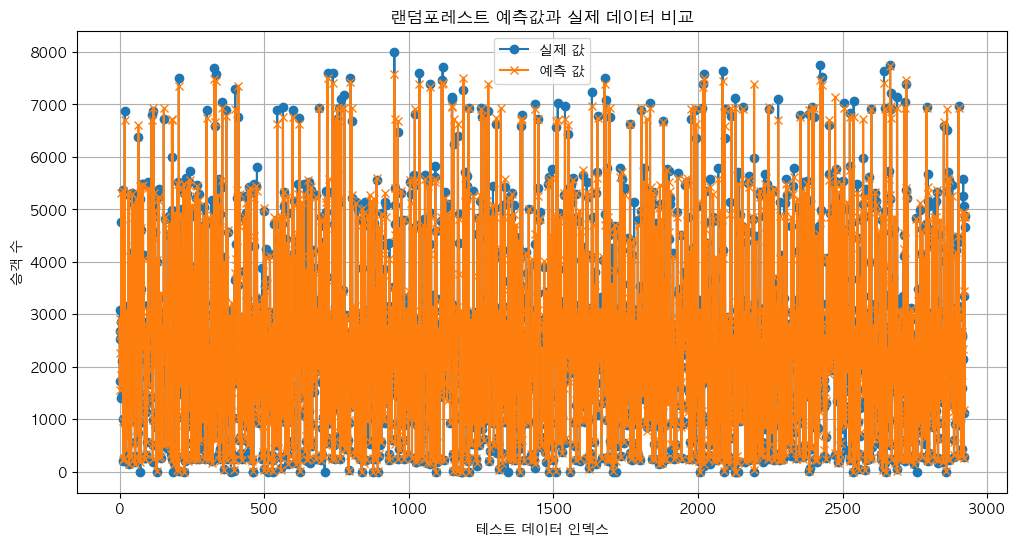

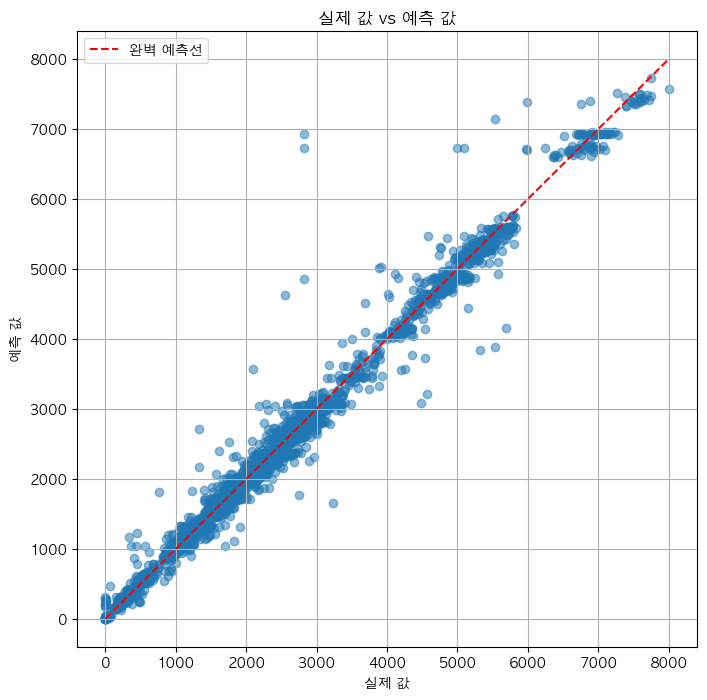

평균 제곱 오차(MSE): 46173.64
결정 계수(R²): 0.98


In [63]:
# 예측값 생성
y_pred = model.predict(X_test)

# 실제 값과 예측값 비교
comparison_df = pd.DataFrame({
    '실제 값': y_test.mean(axis=1),
    '예측 값': y_pred.mean(axis=1)
})
comparison_df.reset_index(drop=True, inplace=True)

# 시각화 - 시간대별 비교
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['실제 값'], label='실제 값', marker='o')
plt.plot(comparison_df['예측 값'], label='예측 값', marker='x')
plt.title('랜덤포레스트 예측값과 실제 데이터 비교')
plt.xlabel('테스트 데이터 인덱스')
plt.ylabel('승객 수')
plt.legend()
plt.grid(True)
plt.show()

# 시각화 - 산점도 비교
plt.figure(figsize=(8, 8))
plt.scatter(comparison_df['실제 값'], comparison_df['예측 값'], alpha=0.5)
plt.plot([comparison_df['실제 값'].min(), comparison_df['실제 값'].max()],
         [comparison_df['실제 값'].min(), comparison_df['실제 값'].max()],
         color='red', linestyle='--', label='완벽 예측선')
plt.title('실제 값 vs 예측 값')
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.legend()
plt.grid(True)
plt.show()

# 성능 평가
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test.mean(axis=1), y_pred.mean(axis=1))
r2 = r2_score(y_test.mean(axis=1), y_pred.mean(axis=1))
print(f"평균 제곱 오차(MSE): {mse:.2f}")
print(f"결정 계수(R²): {r2:.2f}")

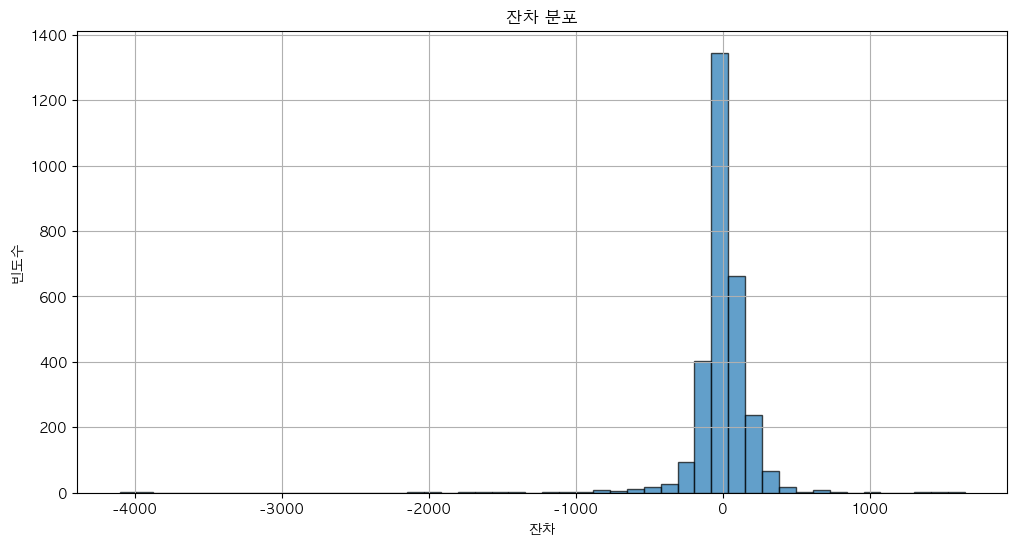

In [64]:
# 잔차 분석
comparison_df['잔차'] = comparison_df['실제 값'] - comparison_df['예측 값']
plt.figure(figsize=(12, 6))
plt.hist(comparison_df['잔차'], bins=50, edgecolor='k', alpha=0.7)
plt.title('잔차 분포')
plt.xlabel('잔차')
plt.ylabel('빈도수')
plt.grid(True)
plt.show()

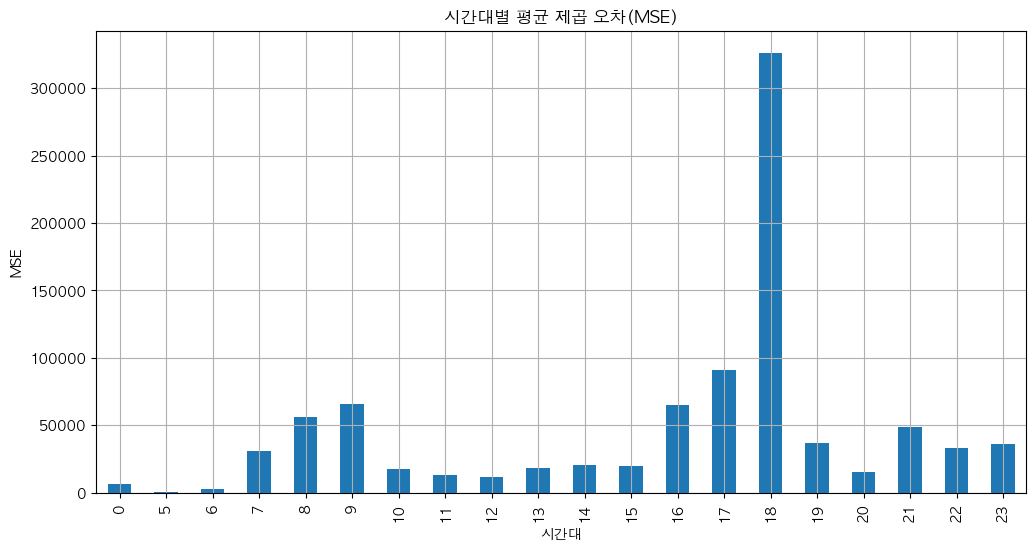

In [65]:
# 오차의 시간대별 분석
comparison_df['시간대'] = X_test['시간'].values
mse_by_time = comparison_df.groupby('시간대').apply(
    lambda x: mean_squared_error(x['실제 값'], x['예측 값'])
)
mse_by_time.plot(kind='bar', figsize=(12, 6), title='시간대별 평균 제곱 오차(MSE)')
plt.xlabel('시간대')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

In [80]:
df.head()

,datetime,연,월,일,시간,요일,주말,공휴일,외국인,우대권,일반
0,2022-06-01 05:00:00,2022,6,1,5,2,0,1,6.0,116.0,939.0
1,2022-06-01 06:00:00,2022,6,1,6,2,0,1,0.0,349.0,1085.0
2,2022-06-01 07:00:00,2022,6,1,7,2,0,1,0.0,232.0,1280.0
3,2022-06-01 08:00:00,2022,6,1,8,2,0,1,0.0,205.0,2402.0
4,2022-06-01 09:00:00,2022,6,1,9,2,0,1,1.0,249.0,3740.0


In [78]:
df.to_csv('../Data/강남 일별 시간대별 승객유형별 승하차인원 최종.csv', index=False)